# London Housing and Population Analysis (2002 - 2015 data)

## 11. Overall Age Distribution Change

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
df = pd.read_csv('../raw_data/borough_changes.csv', index_col=[0])

# Confirm data set structure:
df.info()
df['year'] = df['year'].astype('str')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 461
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   borough                   462 non-null    object 
 1   year                      462 non-null    int64  
 2   all_ages                  462 non-null    int64  
 3   minor                     462 non-null    int64  
 4   18_24                     462 non-null    int64  
 5   25_34                     462 non-null    int64  
 6   35_44                     462 non-null    int64  
 7   45_54                     462 non-null    int64  
 8   55_64                     462 non-null    int64  
 9   65+                       462 non-null    int64  
 10  houses_sold               462 non-null    int64  
 11  average_price             462 non-null    int64  
 12  all_ages_change           429 non-null    float64
 13  all_ages_pct_change       429 non-null    float64
 14  minor_chan

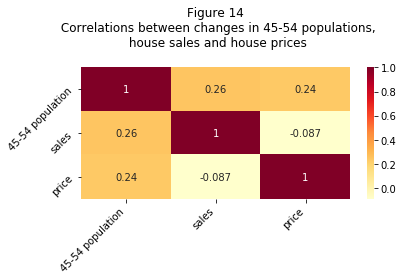

In [3]:
# Determine whether percentage change in 45-54 populations correlates to house price rises and houses sold:
# (2015 as a percentage of 2002 populations)

boroughs = df['borough'].unique().tolist()
variables = ['45_54', 'houses_sold', 'average_price']

views = []
for borough in boroughs:
    borough_view = [borough, ]
    for variable in variables:
        start_df = df.loc[(df['borough'] == borough) & (df['year'] == '2002')]
        start = start_df[variable].values[0]

        end_df = df.loc[(df['borough'] == borough) & (df['year'] == '2015')]
        end = end_df[variable].values[0]

        borough_view.append(start)
        borough_view.append(end)
    views.append(borough_view)

gen_x = pd.DataFrame(views)
gen_x.columns = ['borough', '2002_x_pop', '2015_x_pop', '2002_sales', '2015_sales', '2002_price', '2015_price']

gen_x['pop_pct_change'] = 100 * gen_x['2015_x_pop'] / gen_x['2002_x_pop']
gen_x['sales_change'] = 100 * gen_x['2015_sales'] / gen_x['2002_sales']
gen_x['price_change'] = 100 * gen_x['2015_price'] / gen_x['2002_price']

gen_x_changes = gen_x[['pop_pct_change', 'sales_change', 'price_change']]
corr = gen_x_changes.corr()

fig = plt.figure(figsize=(6, 4))
correlation = sns.heatmap(corr, annot=True, cmap='YlOrRd')
correlation.set_yticklabels(labels=['45-54 population', 'sales', 'price'], rotation=45, ha='right', )
correlation.set_xticklabels(labels=['45-54 population', 'sales', 'price'], rotation=45, ha='right')
plt.title('Figure 14\n Correlations between changes in 45-54 populations,\n house sales and house prices\n', fontdict={'size': 12})
fig.tight_layout()
plt.tight_layout()
plt.savefig('../images/Fig14_correlation_45_54.png')

c:\users\csmyth\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
c:\users\csmyth\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


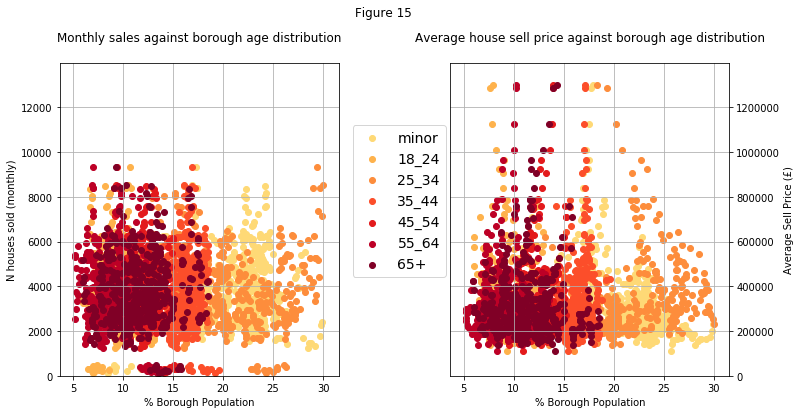

In [4]:
# Consider % of borough population in each age bracket:
age_columns = df.columns[3:10].tolist()
for bracket in age_columns:
    df[f'{bracket}_fraction'] = df[bracket] / df['all_ages']
borough_view = df.groupby(['borough', 'year']).sum(numeric_only=True).reset_index()

# Plot sales and prices against population age %:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

colours = ['#fed976','#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026']
current_colour = 0

for age_fraction in ['minor_fraction', '18_24_fraction', '25_34_fraction', '35_44_fraction', '45_54_fraction', 
'55_64_fraction', '65+_fraction']:
    axs[0]=plt.subplot(1, 2, 1)
    plt.scatter(x=(borough_view[age_fraction] * 100), y=borough_view['houses_sold'], label=age_fraction[:-9], 
    #c=np.array([colours(current_colour)]))
                c=colours[current_colour])
    plt.title('Monthly sales against borough age distribution\n')
    plt.ylabel('N houses sold (monthly)')
    plt.ylim(0, 14000)
    plt.yticks([y * 2000 for y in range(7)])
    plt.xlabel('% Borough Population')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0., prop={'size': 14})

    axs[1] = plt.subplot(1, 2, 2)
    plt.scatter(x=(borough_view[age_fraction] * 100), y=borough_view['average_price'], label=age_fraction[:-9], 
    #c=np.array([colours(current_colour)]))
                c=colours[current_colour])
    plt.title('Average house sell price against borough age distribution\n')
    plt.ylabel('Average Sell Price (£)')
    plt.ylim(0, 1400000)
    plt.yticks([y * 200000 for y in range(7)])
    axs[1].yaxis.set_label_position("right")
    axs[1].yaxis.tick_right()
    
    plt.xlabel('% Borough Population')
    plt.grid(True)

    current_colour += 1


plt.suptitle('Figure 15')
plt.subplots_adjust(top=0.85, wspace=0.4)
#plt.tight_layout()
plt.savefig('../images/Fig15_sales_prices_against_borough_age_distribution.png')
plt.show()

There is less disparity between age groups in the most expensive boroughs.


In areas with the highest proportions of minors and 25-34 year olds, average sell price trends low.  Moreover, these areas also saw relatively few sales.    


This may seem strange: as we saw in Figure 4, these age groups have the biggest populations in London.    
This goes against my instinct to correlate population density with demand for housing and house prices.  
Does this suggest that, although many in number, these age groups represent fewer households?   
Perhaps number of children in a household often surpasses number of adults?   
Or perhaps this suggests that millenials, families with young children, or families with many children in the household are more likely to rent than buy property? 


Further analysis on household composition and property buyers would be necessary to explore these questions.
